# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
 # Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1




# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    
    response = requests.get(city_url)

    response_json = response.json() 
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()['weather']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response.json()['coord']['lat']
        city_lng = response.json()['coord']['lon']
        city_max_temp = (response.json()['main']['temp_max'] - 273.15)
        city_humidity = response.json()['main']['humidity']
        city_clouds = response.json()['clouds']['all']
        city_wind = response.json()['wind']['speed']
        city_country = response.json()['sys']['country']
        city_date = response.json()['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yumen
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | chapais
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | maniwaki
Processing Record 10 of Set 1 | tongren
Processing Record 11 of Set 1 | plainview
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | shelburne
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | brajrajnagar
City not found. Skipping...
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | rorvik
Processing Record 20 of Set 1 | duluth
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | coquimbo
Processing Record 23 of Set 1 | meli

Processing Record 37 of Set 4 | charyshskoye
Processing Record 38 of Set 4 | balkanabat
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | lalomanu
City not found. Skipping...
Processing Record 43 of Set 4 | sorland
Processing Record 44 of Set 4 | the valley
Processing Record 45 of Set 4 | wasilla
Processing Record 46 of Set 4 | halalo
City not found. Skipping...
Processing Record 47 of Set 4 | la ronge
Processing Record 48 of Set 4 | fougamou
Processing Record 49 of Set 4 | cervo
Processing Record 0 of Set 5 | saint george
Processing Record 1 of Set 5 | derzhavinsk
Processing Record 2 of Set 5 | edson
Processing Record 3 of Set 5 | kollo
Processing Record 4 of Set 5 | tifton
Processing Record 5 of Set 5 | ndele
Processing Record 6 of Set 5 | zapolyarnyy
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | auki
Processing Record 9 

Processing Record 30 of Set 8 | vizinga
Processing Record 31 of Set 8 | inta
Processing Record 32 of Set 8 | ukiah
Processing Record 33 of Set 8 | janesville
Processing Record 34 of Set 8 | kysyl-syr
Processing Record 35 of Set 8 | bulgan
Processing Record 36 of Set 8 | ferme-neuve
Processing Record 37 of Set 8 | antibes
Processing Record 38 of Set 8 | hualmay
Processing Record 39 of Set 8 | ambulu
Processing Record 40 of Set 8 | kahului
Processing Record 41 of Set 8 | mastic beach
Processing Record 42 of Set 8 | killybegs
Processing Record 43 of Set 8 | kununurra
Processing Record 44 of Set 8 | boulder city
Processing Record 45 of Set 8 | tiarei
Processing Record 46 of Set 8 | kargopol
Processing Record 47 of Set 8 | makakilo city
Processing Record 48 of Set 8 | moerai
Processing Record 49 of Set 8 | kaitangata
Processing Record 0 of Set 9 | baghdad
Processing Record 1 of Set 9 | masunga
Processing Record 2 of Set 9 | imeni poliny osipenko
Processing Record 3 of Set 9 | touros
Process

Processing Record 21 of Set 12 | mnogovershinnyy
Processing Record 22 of Set 12 | hambantota
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | ojinaga
Processing Record 25 of Set 12 | panaba
Processing Record 26 of Set 12 | tommot
Processing Record 27 of Set 12 | kirakira
Processing Record 28 of Set 12 | coihaique
Processing Record 29 of Set 12 | hammerfest
Processing Record 30 of Set 12 | sitka
Processing Record 31 of Set 12 | kudahuvadhoo
Processing Record 32 of Set 12 | nelson bay
Processing Record 33 of Set 12 | eldorado
Processing Record 34 of Set 12 | la plata
Processing Record 35 of Set 12 | saint-augustin
Processing Record 36 of Set 12 | arklow
Processing Record 37 of Set 12 | shingu
Processing Record 38 of Set 12 | warrington
Processing Record 39 of Set 12 | taoudenni
Processing Record 40 of Set 12 | san patricio
Processing Record 41 of Set 12 | japura
Processing Record 42 of Set 12 | boa vista
-----------------------------
Data Retrieval Complete

In [4]:
city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yumen,40.2833,97.2000,-2.82,37,8,5.02,CN,1675526817
1,castro,-24.7911,-50.0119,21.43,81,99,4.43,BR,1675526567
2,chapais,49.7834,-74.8492,-27.37,86,44,3.23,CA,1675526815
3,punta arenas,-53.1500,-70.9167,10.06,81,100,4.63,CL,1675526738
4,chuy,-33.6971,-53.4616,23.79,61,66,6.88,UY,1675526802


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yumen,40.2833,97.2000,-2.82,37,8,5.02,CN,1675526817
1,castro,-24.7911,-50.0119,21.43,81,99,4.43,BR,1675526567
2,chapais,49.7834,-74.8492,-27.37,86,44,3.23,CA,1675526815
3,punta arenas,-53.1500,-70.9167,10.06,81,100,4.63,CL,1675526738
4,chuy,-33.6971,-53.4616,23.79,61,66,6.88,UY,1675526802


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

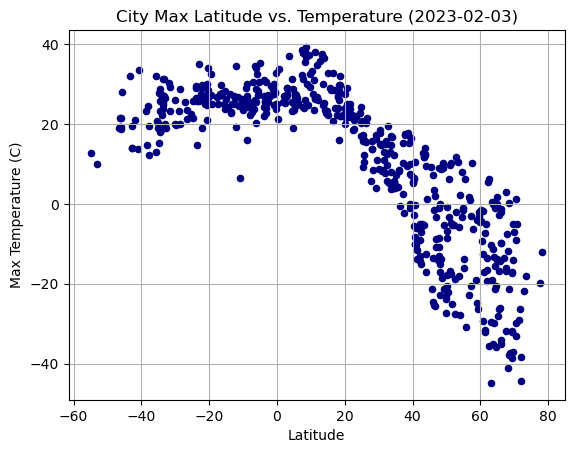

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp', c = 'navy')


# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-02-03)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

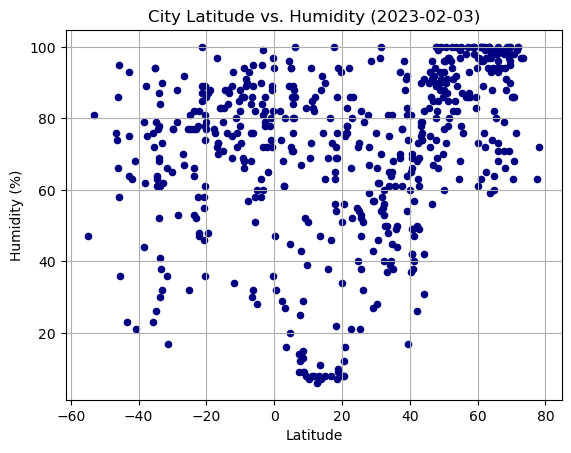

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

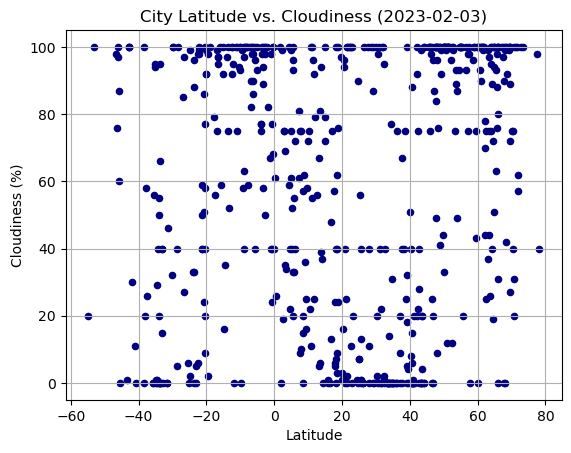

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat','Cloudiness', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

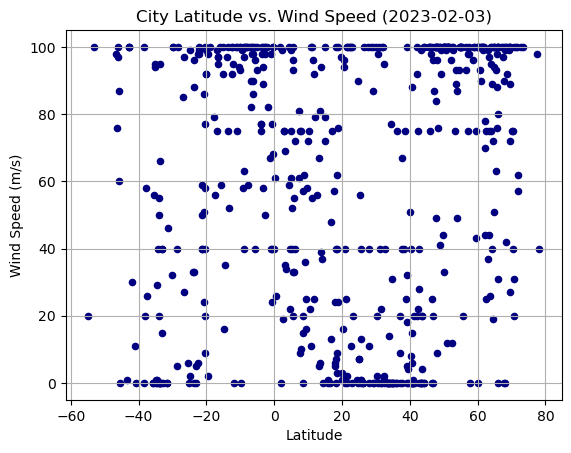

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat','Cloudiness', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, x_label, y_label):
    (m, b, r, p, se) = linregress(x, y)
    print(f"The r-value is {r}")
    regression = m * x + b
    corr_coef = round(st.pearsonr(x,y)[0],2)
    line = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.scatter(x,y)
    plt.plot(x,regression,"r-")
    plt.annotate(line,(5.8,0.8),fontsize=15,color="red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

The r-value is -0.7802980011559772


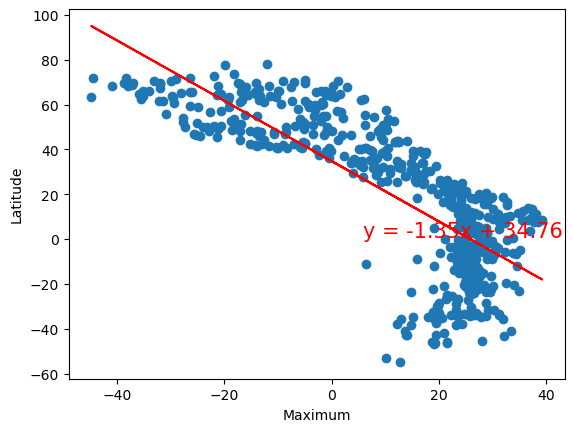

In [60]:
#################################################################

linear_regression(city_data_df['Max Temp'], city_data_df['Lat'], 'Maximum', 'Latitude')

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yumen,40.2833,97.2000,-2.82,37,8,5.02,CN,1675526817
2,chapais,49.7834,-74.8492,-27.37,86,44,3.23,CA,1675526815
5,broome,42.2506,-75.8330,-12.99,68,92,3.58,US,1675526817
7,hilo,19.7297,-155.0900,22.38,93,97,2.24,US,1675526553
8,maniwaki,46.3834,-75.9660,-25.36,86,98,2.70,CA,1675526818


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,castro,-24.7911,-50.0119,21.43,81,99,4.43,BR,1675526567
3,punta arenas,-53.1500,-70.9167,10.06,81,100,4.63,CL,1675526738
4,chuy,-33.6971,-53.4616,23.79,61,66,6.88,UY,1675526802
6,mataura,-46.1927,168.8643,21.49,66,97,2.72,NZ,1675526723
13,mahebourg,-20.4081,57.7000,26.81,78,77,5.49,MU,1675526819


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8673408256973462


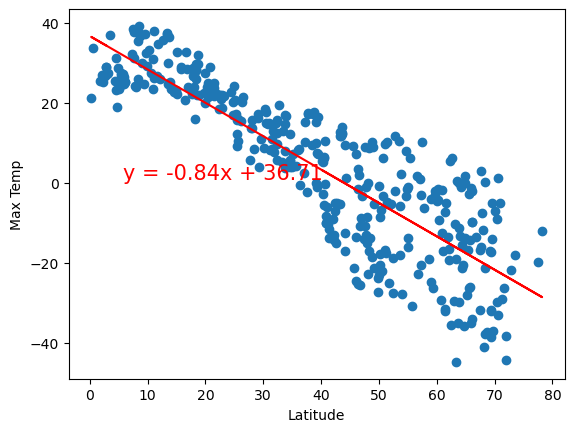

In [61]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is: 0.7161472181434118


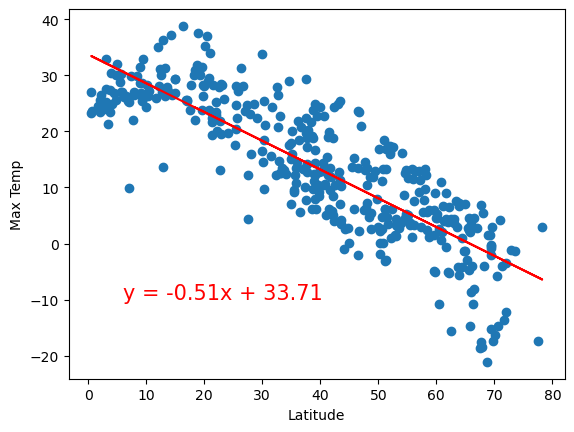

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is 0.41462811274285766


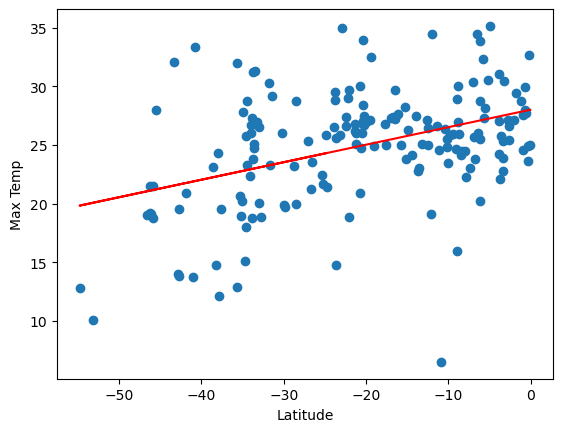

In [62]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is: 0.4121057168607245


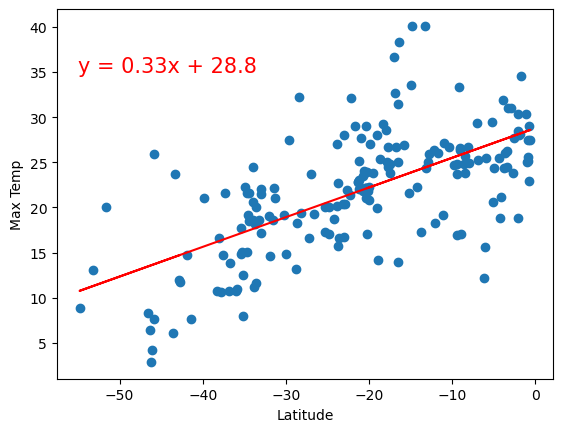

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.5372469365584082


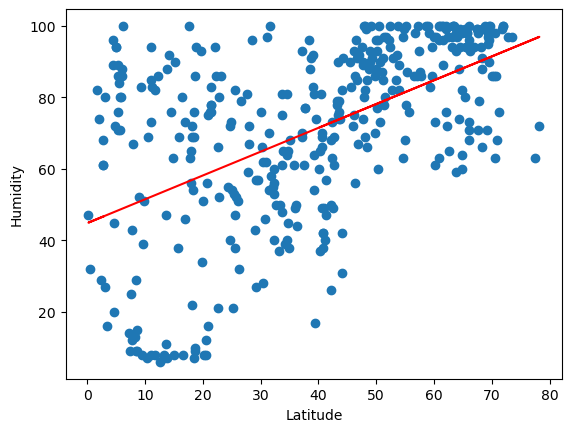

In [52]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is: 0.05689741545789598


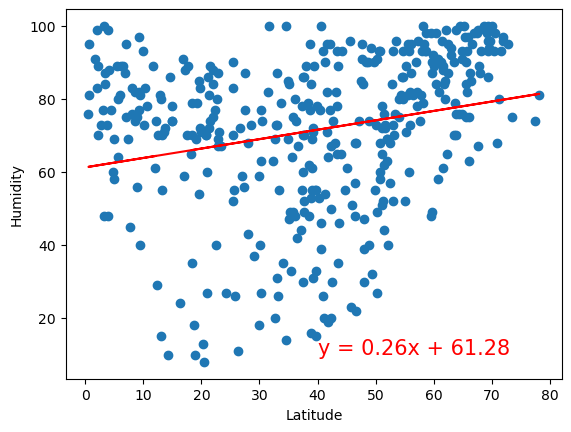

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is 0.25365102915042775


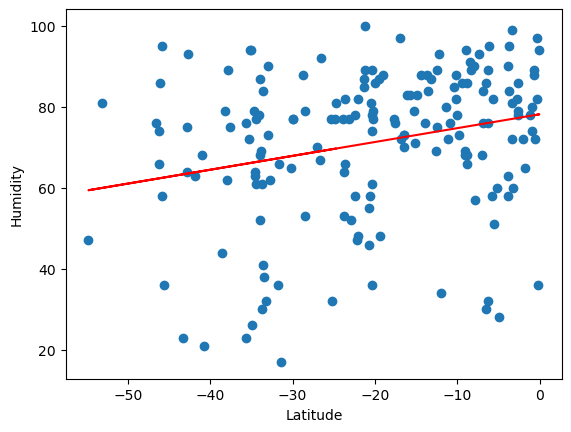

In [53]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is: 0.0002808747046324607


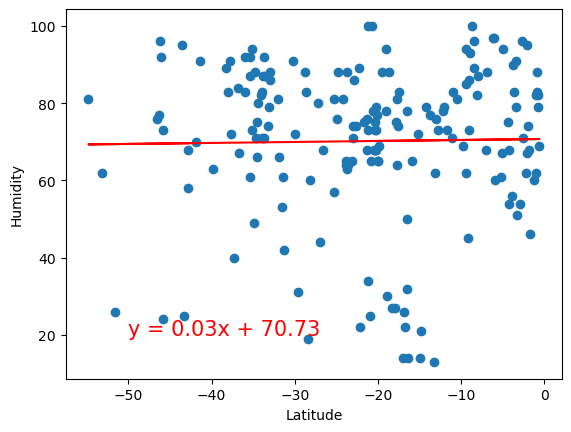

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.31877848652201285


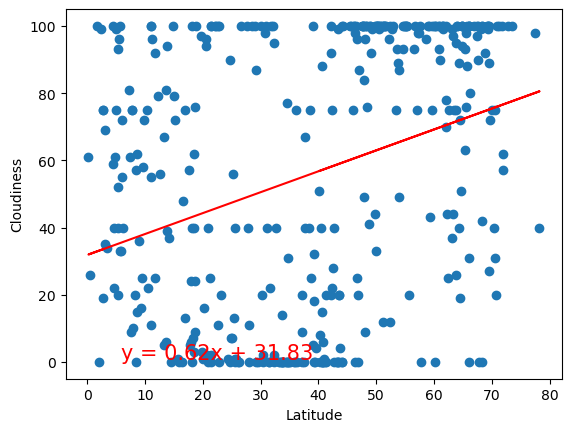

In [54]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is: 0.024026517125811015


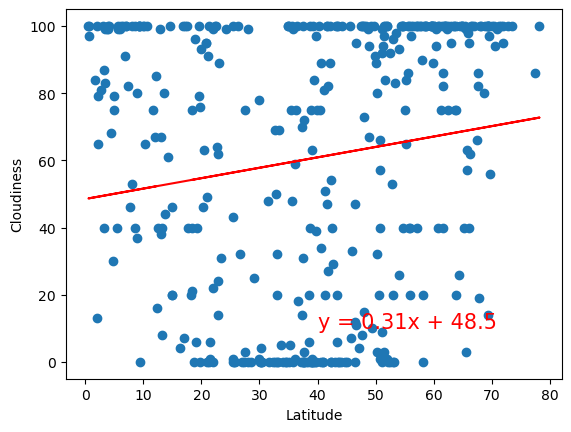

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is 0.39572674671900954


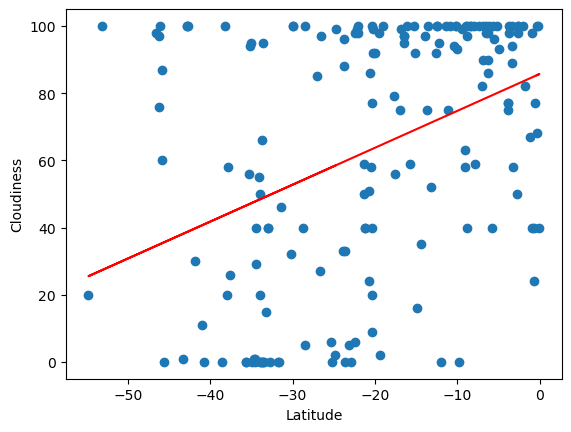

In [55]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is: 0.02056735429994368


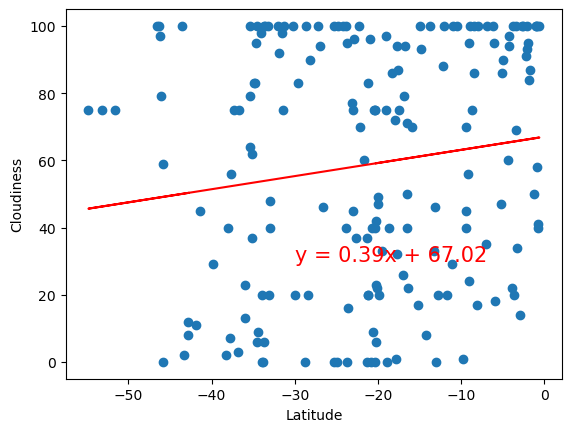

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.004661663774568091


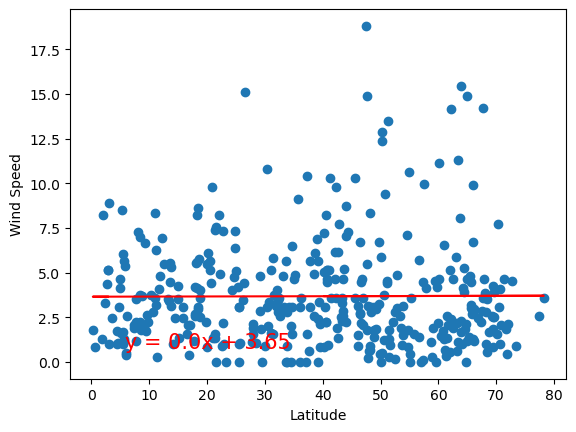

In [57]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is: 0.030396762354449467


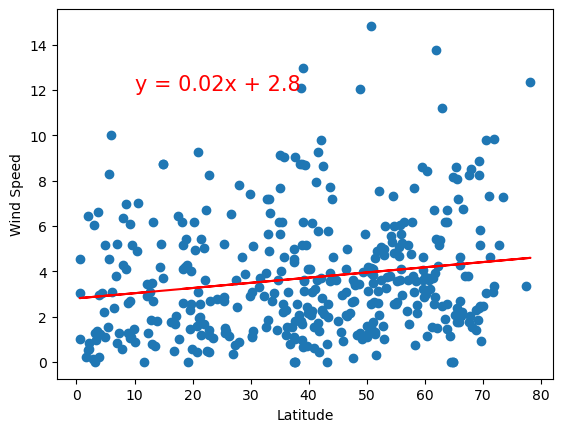

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is -0.19953509004416517


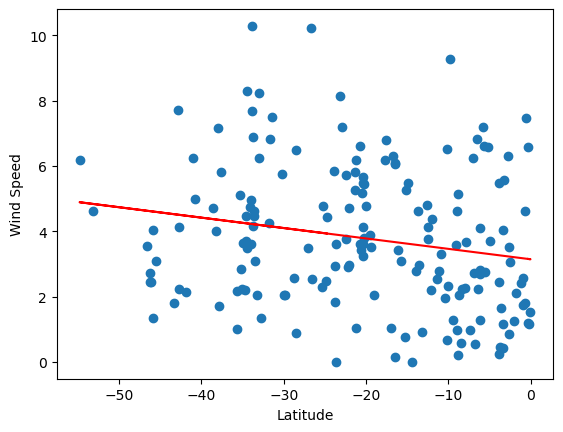

In [58]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is: 0.062239040700515696


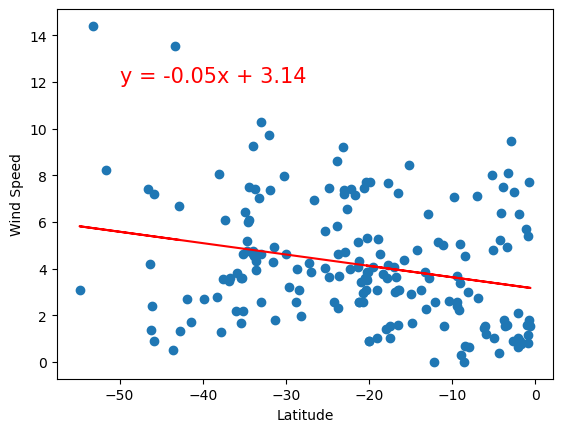

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE